In [1]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('clean_data.csv')

In [20]:
df.head()

,Date,MMWR_week,Location,Distributed,Distributed_Janssen,Distributed_Moderna,Distributed_Pfizer,Distributed_Unk_Manuf,Dist_Per_100K,Distributed_Per_100k_5Plus,...,Additional_Doses_65Plus_Vax_Pct,Additional_Doses_Moderna,Additional_Doses_Pfizer,Additional_Doses_Janssen,Additional_Doses_Unk_Manuf,day_of_week,weekend,season,holiday_season,vax_announcement
0,2023-05-10,19.0,NE,5481710.0,152400.0,1647380.0,2905630.0,0.0,283379.0,303944.0,...,80.7,265916.0,443827.0,7164.0,1215.0,Wednesday,False,spring,False,False
1,2023-05-10,19.0,LA,10282120.0,330500.0,3807980.0,5164550.0,0.0,221178.0,236516.0,...,69.6,486814.0,608975.0,14004.0,364.0,Wednesday,False,spring,False,False
2,2023-05-10,19.0,GA,28727475.0,869100.0,9763000.0,14773655.0,0.0,270569.0,288404.0,...,67.8,1155986.0,1518137.0,26699.0,4168.0,Wednesday,False,spring,False,False
3,2023-05-10,19.0,WY,1281755.0,49300.0,490040.0,585605.0,0.0,221466.0,235691.0,...,71.2,66344.0,77096.0,1930.0,214.0,Wednesday,False,spring,False,False
4,2023-05-10,19.0,CO,17769135.0,501900.0,5402640.0,9029715.0,0.0,308560.0,327449.0,...,81.0,1019757.0,1410438.0,27303.0,2547.0,Wednesday,False,spring,False,False


In [21]:
pred_var = 'Additional_Doses_Vax_Pct'

In [50]:
df['Date'] = pd.to_datetime(df['Date'])
time_series_data = df.groupby('Date')[pred_var].mean().reset_index()
time_series_data = time_series_data.set_index('Date')

In [51]:
time_series_data.head()

,Additional_Doses_Vax_Pct
Date,
2021-11-03,10.332812
2021-11-04,10.790625
2021-11-05,11.245313
2021-11-06,11.745313
2021-11-07,12.135938


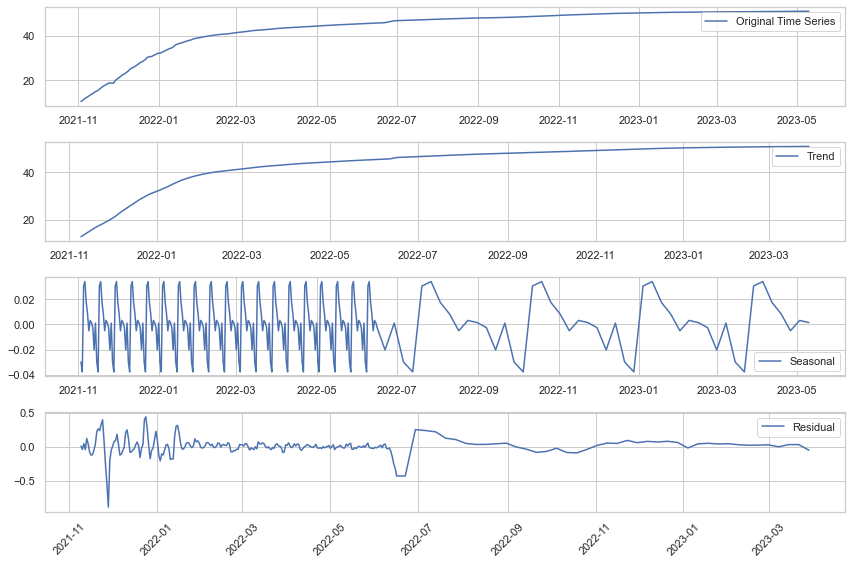

In [52]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform STL decomposition with a known seasonality period (e.g., 12 for monthly data)
result = sm.tsa.seasonal_decompose(time_series_data[pred_var], model='stl', period=12)

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the original time series, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

# Plot a subset of data (e.g., every 30th data point)
plt.subplot(4, 1, 1)
plt.plot(time_series_data[pred_var], label='Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual')
plt.legend()

# Customize x-axis labels to rotate by 45 degrees
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### ARIMA & STATIONARY DATA

In [ ]:
# check for stationary data

In [53]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(time_series_data)
p_value = result[1]
print(p_value)

0.009899692858669729


In [54]:
# p_value < significance_level can reject null (data is not stationary), thus data is stationary

In [56]:
# KPSS test
from statsmodels.tsa.stattools import kpss
result = kpss(time_series_data, regression='c')
p_value = result[1]
print(p_value)

0.01


/Users/blankajarmoszko/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [57]:
data = time_series_data.reset_index()

In [58]:
data.head()

,Date,Additional_Doses_Vax_Pct
0,2021-11-03,10.332812
1,2021-11-04,10.790625
2,2021-11-05,11.245313
3,2021-11-06,11.745313
4,2021-11-07,12.135938


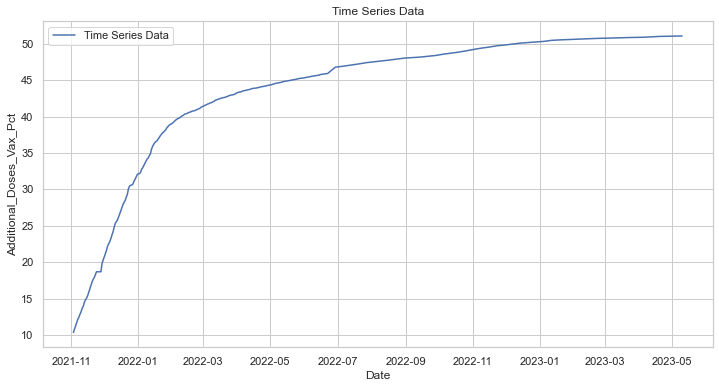

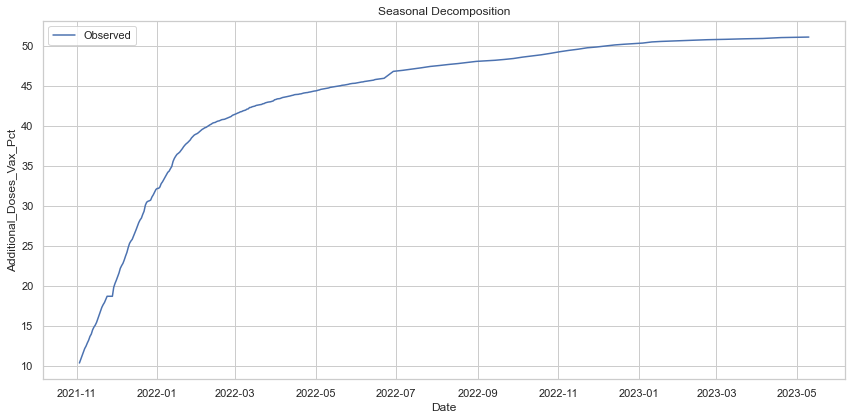

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your time series data into a DataFrame
# Replace this with your actual time series data
# data = pd.read_csv('your_time_series_data.csv')
# data['Date'] = pd.to_datetime(data['Date'])  # Ensure Date column is in datetime format
#data = time_series_data.reset_index()

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data[pred_var], label='Time Series Data')
plt.xlabel('Date')
plt.ylabel(pred_var)
plt.title('Time Series Data')
plt.legend()

# Plot seasonal decomposition
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y=pred_var, data=data, label="Observed")
plt.xlabel('Date')
plt.ylabel(pred_var)
plt.title('Seasonal Decomposition')

# You can add more visualizations here as needed

plt.tight_layout()
plt.show()